#Getting data in and formatting

In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
stations = pd.read_table('stations.tsv')
usage = pd.read_table('usage_2012.tsv')
weather = pd.read_table('daily_weather.tsv')


def change_seasons():
    weather.loc[weather["season_code"] == 1, "season_desc"] = 'Winter'
    weather.loc[weather["season_code"] == 2, "season_desc"] = 'Spring'
    weather.loc[weather["season_code"] == 3, "season_desc"] = 'Summer'
    weather.loc[weather["season_code"] == 4, "season_desc"] = 'Fall'


def convert_dates():
    for i in weather.index:
        weather.ix[i, 'date'] = datetime.datetime.strptime(
            str(weather.ix[i, 'date']), "%Y-%m-%d").date()


def add_months():
    for i in weather.index:
        weather.ix[i, 'month'] = weather.ix[i, 'date'].month


change_seasons()
convert_dates()
add_months()

#Step 1: Get User counts per day at each station

In [20]:
yr_perstation = DataFrame(usage['station_start'].value_counts())
yr_perstation.columns = ["yr_count"]
yr_perstation['day_count'] = yr_perstation['yr_count']/365
yr_perstation['station'] = yr_perstation.index

cstations = stations.merge(yr_perstation, how="inner", left_on="station", right_on="station")


#Step 2a

In [21]:
from sklearn.linear_model import LinearRegression
# Here we grap all variables that we expect to monotonically impact ridership; this excludes
# geographic clustering which should be addressed by a clustering type model
x = cstations.ix[:, 5:136]
y = cstations.ix[:, 137]

model = LinearRegression()
model.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

##Predict from training data

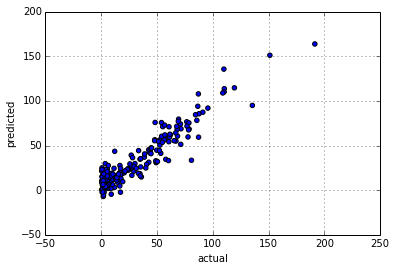

In [25]:
predicted = model.predict(x)
actual = cstations.day_count

predicted = DataFrame(predicted)
actual = DataFrame(actual)

predicted.columns = ['predicted']
actual.columns = ['actual']

lindata = actual.join(predicted)
lindata.plot(x='actual', y='predicted', kind='scatter')

